<a href="https://colab.research.google.com/github/puneetxp/Class/blob/master/Machine%20Learning%20Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![DSL_logo](https://github.com/BrockDSL/Machine_Learning_with_Python/blob/master/dsl_logo.png?raw=1)

# Introduction to Machine Learning with Python


In our [Data Science](https://brockdsl.github.io/Python_2.0_Workshop/) workshop we introduced some concepts by looking at some fictional data about people that got sick with a mysterious illness. In this session we are going to see if we can build a machine learning model to see if we can predict who has the illness based on the answers to some questions.

As a further exercise we'll setup two examples that try to guess the quality of wine. I encourage you to try out these examples after class is done.



## First, a brief recap on Python code

The following code should look familiar to you

In [19]:
import pandas as pd

#Load the file into a dataframe using the pandas read_csv function
data = pd.read_csv("https://brockdsl.github.io/Python_2.0_Workshop/canadian_toy_dataset.csv")

#Tell it what our columns are by passing along a list of that information
data.columns = ["city","gender","age","income","ill"]

print("Ill or not?")
print(data.groupby("ill")["city"].count())
print("\nTotal records:", len(data))


Ill or not?
ill
No     137861
Yes     12139
Name: city, dtype: int64

Total records: 150000


## Machine Learning Basics

Don't let the impressive name fool you. Machine learning is more or less the following steps

1. Getting your data and cleaning it up
1. Identify what parts of your data are **features**
1. Identify what is your **target variable** that you'll guess based on your features
1. Split your data in **training and testing sets**
1. **Train** your model against the training set
1. **Validate** your model against the testing set
1. ????
1. Profit


We are going to use the Python library [scikit-learn](https://scikit-learn.org/stable/) and we are going to be doing a [classification](https://en.wikipedia.org/wiki/Statistical_classification) problem.

![classification](https://raw.githubusercontent.com/BrockDSL/Machine_Learning_with_Python/master/classification.png)


## Decision Tree

This is one of the most basic machine learning model you can use. It is considered a [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) method. You create the best [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning) that you can based on your training data. Here's an example tree that shows your chance of surviving the Titanic disaster. What we are creating is series of question that when answered will put observations into a _bucket_ or in other terms one of the classification options. We also devise a probability associated with an observation falling into that _bucket_.

The features are described by the labels, however ``sibsp`` - is the number of spouses or siblings on board.

![dtree](https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg)


So in this tree the most important question to ask first is what is the gender of the person you are considering, then next most important question is age above 9 and a half, followed lastly by, does this person have less than three spouses or siblings on board.


Let's start by loading the Libraries we need

In [20]:

#This should look familar
import pandas as pd
#import numpy as np


#We'll draw a graph later on
import matplotlib.pyplot as plt

#Our 'Machine Learning pieces'
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn import metrics
from sklearn import tree

print("Ready to proceed!")

Ready to proceed!


## Getting the data ready

Now, let's load our data. Our decision tree can only work with numerical values, so we'll have to modify the columns of data that are text based. As stated preparing the data is usually the most difficult part of the process.

In [55]:
data = pd.read_csv("https://brockdsl.github.io/Python_2.0_Workshop/canadian_toy_dataset.csv")
data.columns = ["city","gender","age","income","ill"]
data.head()

,city,gender,age,income,ill
0,Montreal,Male,41,40367,No
1,Montreal,Male,54,45084,No
2,Montreal,Male,42,52483,No
3,Montreal,Male,40,40941,No
4,Montreal,Male,46,50289,No


This dataset is fairly clean, we just need to represent it all as numbers instead of text labels. So that means we need to change the columns:


- `ill` - instead of a No / Yes label we'll use 0 and 2 instead
- `city` - this will break out the column into 8 different columns
- `gender` - this will break out the column into 2 different columns




In [56]:
#Instead of yes/no we'll use a 0 or 2
#We use the value '2' to make our analysis later on less ambiguous
# data["ill"].replace({"No":0, "Yes":2},inplace=True)
data["ill"].replace({"No":0, "Yes":2},inplace=True)

data["ill"] = data["ill"].astype(int)
#We change categorical values into numeric ones using `dummies`
data = pd.get_dummies(data, columns=['city','gender'])
data.head(5)

<ipython-input-56-f4adbdedff17>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["ill"].replace({"No":0, "Yes":2},inplace=True)


,age,income,ill,city_Edmonton,city_Halifax,city_Montreal,city_Ottawa,city_Regina,city_Toronto,city_Vancouver,city_Waterloo,gender_Female,gender_Male
0,41,40367,0,False,False,True,False,False,False,False,False,False,True
1,54,45084,0,False,False,True,False,False,False,False,False,False,True
2,42,52483,0,False,False,True,False,False,False,False,False,False,True
3,40,40941,0,False,False,True,False,False,False,False,False,False,True
4,46,50289,0,False,False,True,False,False,False,False,False,False,True


The example above shows 5 entries that that come from Montreal.

In [38]:
data.tail(5)

,age,income,ill,city_Edmonton,city_Halifax,city_Montreal,city_Ottawa,city_Regina,city_Toronto,city_Vancouver,city_Waterloo,gender_Female,gender_Male
149995,48,93669,0,True,False,False,False,False,False,False,False,False,True
149996,25,96748,0,True,False,False,False,False,False,False,False,False,True
149997,26,111885,0,True,False,False,False,False,False,False,False,False,True
149998,25,111878,0,True,False,False,False,False,False,False,False,False,True
149999,37,87251,0,True,False,False,False,False,False,False,False,True,False


This example shows the last 5 entries in the dataframe that come from Edmonton.


## Now we are done the most difficult part of the process, understanding the data and getting it ready.


----

## Building and Running the Model

We now have our data cleaned up, and represented in a way that Scikit will be able to analyze. To be honest the most difficult part of the process is done.

We now need to split our columns in two types:
- **features** represent the data we use to build our guess
- **target variable** the thing our model hopes to guess

In [39]:
#all of the following columns are features, we'll make a list of their names
features = ["age",\
            "income",\
            "city_Edmonton",\
            "city_Halifax",\
            "city_Montreal",
            "city_Ottawa",\
            "city_Regina",\
            "city_Toronto",
            "city_Vancouver",\
            "city_Waterloo",\
            "gender_Female",\
            "gender_Male"]

X = data[features]

#We want to target the ill column
y = data.ill


## Training and testing

Now that we have built our model we need to get the data ready for it. We do this by breaking it into two different pieces. The diagram shows a conceptualization of how this is proportioned.

![Train Test Split](https://raw.githubusercontent.com/BrockDSL/Machine_Learning_with_Python/master/train_test.png)

- **Training set** - This is what is used to build the model. If we set this value too large the ML Model just _memorizes_ the data so we need to be careful when setting this value. This is called _overfitting_ the data.
- **Testing set** - This is used to see if our guesses are correct

Before we were looking at the **columns** of the data, this investigation of training/testing looks at the **rows** of data.



In [40]:
#Training and test together make up 100% of the data!
#We start with a baseline of 30% of our data as testing

test_percent = 30
train_percent = 100 - test_percent

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=test_percent/100.0,
                                                   random_state=10)

Now the interesting part, we build our model, **train** it against the **training set** and see how it **predicts** against the **testing set**

In [41]:
# Create Decision Tree classifer object
treeClass = DecisionTreeClassifier()

# Train
treeClass = treeClass.fit(X_train,y_train)

#Predict
y_pred = treeClass.predict(X_test)


## Accuracy of the Model

To see how good our machine learning model is we need to see how accurate our predictions are. `Scikit` has built in functions and [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) to do this for us.

In [42]:
print("Accuracy: ")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy: 
0.8457333333333333



## Making Predictions

Not bad. We can use our model to predict a guess for **ill** if we pass along all of the other parameters. Our model only tells us if someone is ill or not. This is directly asking our classification model to give us a prediction based on a pretend record.

Since this classifier tells us if someone is ill or someone is not ill, it has two outputs.


In [43]:
data.ill.unique()

array([0, 2])

In [44]:
# I randomly picked a record in the dataset to test if the prediction is correct.
# This is from line: 149120 of the datafile
person_x_yes = [
        32, #age
        82311, #income
        1, #city_Edmonton
        0, #city_Halifax
        0, #city_Montreal
        0, #city_Ottawa
        0, #city_Regina
        0, #city_Toronto
        0, #city_Vancouver
        0, #city_Waterloo
        0, #gender_Female
        1, #gender_Male
]

person_x_yes = pd.DataFrame([person_x_yes],columns=X_test.columns)

print("Someone who is ill")
print("Class predicted by model: ",treeClass.predict(person_x_yes))
print("Probablity associated with the guess: ",treeClass.predict_proba(person_x_yes))



# I randomly picked a record in the dataset to test if the prediction is correct.
# This is from line: 149121 of the datafile
person_x_no = [
        40, #age
        89780, #income
        1, #city_Edmonton
        0, #city_Halifax
        0, #city_Montreal
        0, #city_Ottawa
        0, #city_Regina
        0, #city_Toronto
        0, #city_Vancouver
        0, #city_Waterloo
        1, #gender_Female
        0, #gender_Male
]

#Use the dataframe of our fictional person in our model and get our prediction
person_x_no = pd.DataFrame([person_x_no],columns=X_test.columns)

print("\nSomeone who was not ill")
print("Class predicted by model: ", treeClass.predict(person_x_no))
print("Probablity associated with the guess: ", treeClass.predict_proba(person_x_no))



Someone who is ill
Class predicted by model:  [2]
Probablity associated with the guess:  [[0. 1.]]

Someone who was not ill
Class predicted by model:  [0]
Probablity associated with the guess:  [[1. 0.]]


Our model is very confident in it's ability to made predictions!

With this model constucted we can make ask it question so to speak. We can provide it with details about a pretend person and see what classification the model will place this person.

## Making a prediction with our model

Try to set some parameters in the `pretend_person` variable below to make the prediction determine that the person is **ill**. If you can find one please copy and paste it into the chat box for others to try. You can do this by:
- changing the values **line 2 & line 3** for age and income
- pick one line from **line 4 to line 11** and change a single row to a value of 1
- pick one line from **line 12 to line 13** and change a single row to a value of 1


## Question 1
- Try to come up with some set of values that creates an `ill` person. Share your choices in the chat box
- Try to come up with some set of values that doesn't create an `ill` person. Share you choices in the chat box

In [45]:
pretend_person = pd.DataFrame([
        30, #age - FILL IN
        5000, #income - FILL IN
        1, #city_Edmonton - ONLY 1 city at a time
        0, #city_Halifax
        0, #city_Montreal
        0, #city_Ottawa
        0, #city_Regina
        0, #city_Toronto
        0, #city_Vancouver
        0, #city_Waterloo
        1, #gender_Female - ONLY 1 gender at a time
        0, #gender_Male
])


#turn our pretend person into a dataframe that is the correct dimensions
pretend_person = pretend_person.T
pretend_person.columns = X_test.columns

print("\Pretend person details")
print(pretend_person.head())

print("Pretend person Class predicted")
print(treeClass.predict(pretend_person))

print("Pretend person probablity of guess")
print(treeClass.predict_proba(pretend_person))

\Pretend person details
   age  income  city_Edmonton  city_Halifax  city_Montreal  city_Ottawa  \
0   30    5000              1             0              0            0   

   city_Regina  city_Toronto  city_Vancouver  city_Waterloo  gender_Female  \
0            0             0               0              0              1   

   gender_Male  
0            0  
Pretend person Class predicted
[0]
Pretend person probablity of guess
[[1. 0.]]



## Visualizing our Decision Tree

We can 'visualize' the decision tree to trace through the decisions it makes. In this case we can tell that **income level** is the most important factor that we consider since we ask so many questions about that before looking at any of the other features.

## Question 2

What is the first question the tree is asking you to make? Share your thoughts in the chat box.

In [46]:
printed_tree = export_text(treeClass,feature_names=features)
print(printed_tree)

|--- income <= -35.00
|   |--- class: 2
|--- income >  -35.00
|   |--- income <= 29255.00
|   |   |--- income <= 29190.00
|   |   |   |--- income <= 3254.50
|   |   |   |   |--- income <= 2570.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- income >  2570.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- income >  3254.50
|   |   |   |   |--- income <= 24960.00
|   |   |   |   |   |--- income <= 22569.00
|   |   |   |   |   |   |--- income <= 22544.50
|   |   |   |   |   |   |   |--- income <= 18228.50
|   |   |   |   |   |   |   |   |--- age <= 54.50
|   |   |   |   |   |   |   |   |   |--- age <= 42.50
|   |   |   |   |   |   |   |   |   |   |--- age <= 41.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- age >  41.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- age >  42.50
|   |   |   |   |   |   |   |   |   |   |--- class

## Tuning parameters - Testing Set Sizes

To make our models run better we can tweak _many, many, many_ different parameters. For example, we can vary the testing data size percentage. We'll try some different values and plot our our accuracy of our predictions.

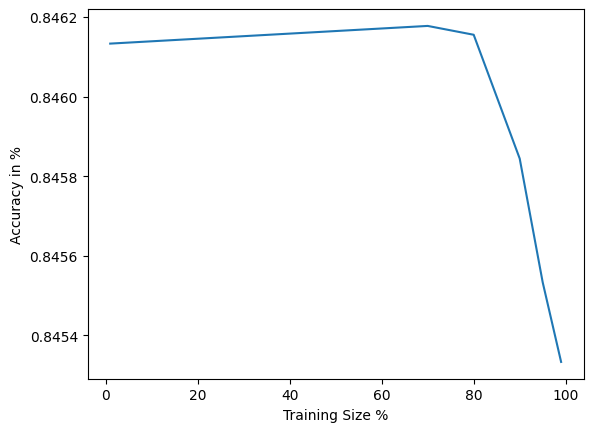

In [47]:
testing_percents = [1,5,10,20,30,99]
accuracy = []
training_percents = []

for test_ratio in sorted(testing_percents):
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10)
    treeClassTest = DecisionTreeClassifier()
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    training_percents.append(100 - test_ratio)


plt.plot(training_percents,accuracy)
plt.ylabel("Accuracy in %")
plt.xlabel("Training Size %")
plt.show()

(Your graph might look different, this is a statistical operation and will probably vary across different machines)

## Tuning Parameters - Maximum depth of the tree

We can restrict how deep our tree will be by setting `max_depth` in our `DecisionTreeClassifier` variable. Below is another example of trying different values in our ML model for this parameter and plotting out the accuracy of our model.

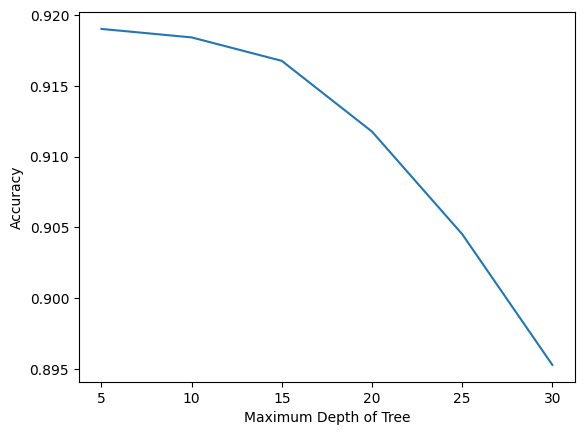

In [48]:
test_percent = 70
max_options = [5,10,15,20,25,30]

accuracy = []
tree_max = []

for max_d in sorted(max_options):
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10,
                                                       )

    #We set maximum depth in the DecisionTreeClassifer when we first create the variable
    treeClassTest = DecisionTreeClassifier(max_depth=max_d)
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    tree_max.append(max_d)


plt.plot(max_options,accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Maximum Depth of Tree")
plt.show()

# Example 2

We are going to look at a [cancer survivor data set](http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival) from the UCI machine learning archive.

![cancer_description](https://raw.githubusercontent.com/BrockDSL/Machine_Learning_with_Python/master/cancer_characteristics.png)


In [49]:
cancer_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data",header=None)
cancer_data.columns = ["age","operation_year","positive_nodes","survival_status"]
cancer_data.describe()

,age,operation_year,positive_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Setting up our model

## Question 2

- What should our features list look like?
- What should or target column be

You need to do two things:
1. uncomment one line between **line 3 & line 7**
2. uncomment one line between **line 13 & line 16**

In [51]:
#What features list should we use, uncomment the correct answer

cancer_features = ["age","operation_year","positive_nodes","survival_status"]
cancer_features = ["age","operation_year","positive_nodes"]
cancer_features = ["age","operation_year"]
cancer_features = ["age"]
cancer_features = ["operation_year","positive_nodes","survival_status"]


#What target should we use, uncomment the correct answer

cancer_target = cancer_data.age
cancer_target = cancer_data.operation_year
cancer_target = cancer_data.positive_nodes
cancer_target = cancer_data.survival_status

X = cancer_data[cancer_features]
y = cancer_target

## Question 2

## Continued

Now that you have your features and target set, run the next cell to build and test your model.

Once you are done type "finished" in the chatbox.

In [52]:
#We'll start with 40 just for fun
test_percent = 40

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=test_percent/100.0,
                                                   random_state=10)
# Create Decision Tree classifer object
treeClass = DecisionTreeClassifier()

# Train
treeClass = treeClass.fit(X_train,y_train)

#Predict
y_pred = treeClass.predict(X_test)

#Accuracy
print("Accuracy:")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy:
1.0


### Visualizing the tree

Now that we have a tree built for this scenario let's display it to the screen.

In [53]:
printed_tree = export_text(treeClass,feature_names=cancer_features)
print(printed_tree)

|--- survival_status <= 1.50
|   |--- class: 1
|--- survival_status >  1.50
|   |--- class: 2



## Tuning the testing set size

## Question 3

Experiment with adding some values in the `testing_percents_cancer` list on **line 3**.

In the chat box put in the testing set size that produced the best results.

When you are done experiementing type "Done!" in the chat box.

In [54]:
# put in some values between 0 - 99
# add at least 4 values in between the commas
testing_percents_cancer = [,,,]

#Let's make sure the numbers are all increasing so our graph looks good
testing_percents_cancer = sorted(testing_percents_cancer)

accuracy = []
training_percents = []

for test_ratio in testing_percents_cancer:
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10)
    treeClassTest = DecisionTreeClassifier()
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    training_percents.append(100 - test_ratio)


plt.plot(training_percents,accuracy)
plt.ylabel("Accuracy in %")
plt.xlabel("Training Size %")
plt.show()

SyntaxError: invalid syntax (<ipython-input-54-490c4a3cd173>, line 3)

## Turning Parameters, Maximum Tree Depth

## Question 4

Experiment with adding some values in the `max_options_cancer` list on **line 5**.

In the chat box put in the testing set size that produced the best results.

When you are done experiementing type "Done!" in the chat box.

In [ ]:
test_percent = 30

#Put in some options between 1 and 40
#add at least 4 values between the commas
max_options_cancer = [,,,]

#Let's make sure the numbers are all increasing so our graph looks good
max_options_cancer = sorted(max_options_cancer)

accuracy = []
tree_max = []

for max_d in max_options_cancer:
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10,
                                                       )

    #We set maximum depth in the DecisionTreeClassifer when we first create the variable
    treeClassTest = DecisionTreeClassifier(max_depth=max_d)
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    tree_max.append(max_d)


plt.plot(max_options_cancer,accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Maximum Depth of Tree")
plt.show()



## Maximizing Accuracy

## Question 5

- What is the best combination of `max_depth` and `testing size` that produced the *highest* accuracy?
- What is the worst combination of `max_depth` and `testing size` that produced the *lowest* acccuracy?

You just need to add some values to **line 3** & **line 4**.

Share your answers in the chat.

You can experiment using the following cell:

In [ ]:

#Change the following values
test_percent =
max_tree_depth =

#HINT: You can use the previous graphs to help you pick your values

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=test_percent/100.0,
                                                   random_state=10)
# Create Decision Tree classifer object
treeClass = DecisionTreeClassifier(max_depth=max_tree_depth)

# Train
treeClass = treeClass.fit(X_train,y_train)

#Predict
y_pred = treeClass.predict(X_test)

#Accuracy?
print("\nAccuracy of our tree: ")
print(metrics.accuracy_score(y_test,y_pred))


#Display our final tree
print("\nBest tree found:\n")
printed_tree = export_text(treeClass,feature_names=cancer_features)
print(printed_tree)

## Congrats!

We have just scratched the surface with what is possible with Python and SciKit. Remember, don't let the name **Machine Learning** fool you. Most of the time the computer is making guesses based on past data. Sometimes this works good, sometimes it doesn't work so good!

## Further Reading

- [UCI Machine Learning Archive](http://archive.ics.uci.edu/ml) A place to find good data sets that you can use to build models with

- [A Gentle Introduction to Scikit-Learn](https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/)

- [Data Science Handbook by Field Cady](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119092919)

- [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) - A bit more complex, but is a good next step

- [Kaggle](https://kagge.com) - A great website with lots of tutorials and data sets to learn and experiment with
- [Python for Librarians](https://libraryjuiceacademy.com/shop/course/270-python-for-librarians/) - A 4 week course that I teach that explores Python, data science, and machine learning.


----

## Post Workshop Exercises


We'll now try to apply what we know about decision trees. We are going to use a dataset from the [UCI machine learning archive](http://archive.ics.uci.edu/ml/datasets/Wine+Quality). We'll start with the white wine data. This screen capture shows the details of the columns of the data:

![wine_columns](https://raw.githubusercontent.com/BrockDSL/Machine_Learning_with_Python/master/wine_columns.png)

We want to create a classification that guesses the quality of the wine based on the first 11 chemical characteristics.

In [ ]:
white_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=';')
white_wine

What features should be in our model? What should our target be? Let's look at our dataframe columns.

In [ ]:
white_wine.columns

## Q1

Let's fill in the `white_wine_features` list variable below

In [ ]:
#fill in this list
white_wine_features = []

white_X_features = white_wine[white_wine_features]
white_X_features

## Q2

In the chat box describe what our **target** should be.
Complete the assignment for `white_target` below once you have an answer

In [ ]:
#we're looking for the column name
white_target = white_wine

## Q3
Try to come up with a good testing percentage size. Share it with everyone else after you've measured your model.

In [ ]:

white_test_percent =

#Split into training testing
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(white_X_features, \
                                                    white_target, \
                                                    test_size=white_test_percent/100.0,
                                                   random_state=10)



**Congratulations!!** You have done the most difficult part of a machine learning task. Understanding the data.

Let's train our model and get our predictions

In [ ]:
# Create Decision Tree classifer object
whiteTree = DecisionTreeClassifier()

# Train
whiteTree = whiteTree.fit(X_white_train,y_white_train)

#Predict
white_prediction = whiteTree.predict(X_white_test)

Let's see how accurate we are...

In [ ]:
print("Accuracy")
print(metrics.accuracy_score(y_white_test,white_prediction))

Let's draw out our tree...

In [ ]:
printed_tree = export_text(whiteTree,feature_names=white_wine_features)
print(printed_tree)

Let's do some predictions with this tree

In [ ]:
# From line 1408, 8.2;0.22;0.36;6.8;0.034;12;90;0.9944;3.01;0.38;10.5;8
white_x_good = [
    8.2, #'fixed acidity'
    0.22, #'volatile acidity'
    0.36, #'citric acid'
    6.8, #'residual sugar'
    0.034, #'chlorides'
    12, #'free sulfur dioxide'
    100, #'total sulfur dioxide'
    0.0, #'density'
    0.9944, #'pH'
    0.038, #'sulphates'
    10.5  #'alcohol'
]

white_x_good = pd.DataFrame([white_x_good],columns=X_white_test.columns)
whiteTree.predict_proba(white_x_good)


## Q4

The above answer is a list with only 7 options, yet our wine score is from 0-10. Can you come up with why that is the case. Feel free to write you answer in the chat box.

If you need a hint, run the following cell.

In [ ]:
sorted(white_wine["quality"].unique())

## Q5

One more time!

(If we have time together we'll try this, if not please give it a shot on your own) Let's try the red wine data, does the classification work better? What is the best score you can get?

In [ ]:
red_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
red_wine.columns

In [ ]:
#Set the next 3 variables and the model will run correctly

#Create this list, this will be the same as with the white wine
red_features = []

#What column do we want to target, this will be the same as with the white wine
red_target = red_wine.

#What is a good testing percentage
red_test_percent =


#Build and run our model...
red_X_features = red_wine[red_features]

#Split into training testing
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(red_X_features, \
                                                    red_target, \
                                                    test_size=red_test_percent/100.0, \
                                                    random_state=10)

# Create Decision Tree classifer object
redTree = DecisionTreeClassifier()

# Train
redTree = redTree.fit(X_red_train,y_red_train)

#Predict
red_prediction = redTree.predict(X_red_test)

#How good is this model?
print("Accuracy: ")
print(metrics.accuracy_score(y_red_test,red_prediction))

#Visualize this tree
printed_tree = export_text(redTree,feature_names=red_features)
print(printed_tree)

## Q6

Make a prediction with a record from the [red wine data](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv). Is it accurate?

In [ ]:
red_x = [
    0.0, #'fixed acidity'
    0.0, #'volatile acidity'
    0.0, #'citric acid'
    0.0, #'residual sugar'
    0.0, #'chlorides'
    0, #'free sulfur dioxide'
    0, #'total sulfur dioxide'
    0.0, #'density'
    0, #'pH'
    0, #'sulphates'
    1  #'alcohol'
]

red_x = pd.DataFrame([red_x],columns=X_red_test.columns)
redTree.predict_proba(red_x)

## Sizes and Scores

Let's just take a look at our data size and how good our models are

In [ ]:

#white wine data
print("")
print("White Wine Data")
print("Records ",len(white_wine))
print("Accuracy ",metrics.accuracy_score(y_white_test,white_prediction))

#red wine data
print("")
print("Red Wine Data")
print("Records ",len(red_wine))
print("Accuracy ",metrics.accuracy_score(y_red_test,red_prediction))